In [97]:
import numpy as np
from collections import deque


def weighted_sample(weights):
    """
    Sample a weighted probability distribution
    returns an index
    """
    total_w = weights / np.sum(weights)
    sample_val = np.random.uniform(0, 1)
    for idx, w in enumerate(total_w):
        sample_val -= w
        if sample_val <= 0:
            return idx
    return len(weights) - 1


# initialize M with M elements of shape (1,2)
M = np.random.randint(0, 100, (1000, 1, 2))
# print(M)
# initialize not chosen

def distance(k,m):
    D = lambda ck, m: np.sqrt(
        np.sum(np.array([np.power(i, 2) for i in (ck - m).flatten()]))
    )
    return D(k,m)

def assign_clusters(data, centroids):
    clusters = [[] for _ in centroids]
    print(len(data))
    for img in data:
        # print(img.shape)
        min_dist = float("inf")
        nn = None
        for idx, ctr in enumerate(centroids):
            # print(ctr.shape)
            if np.array_equal(img, ctr):
                continue
            pdist = distance(img, ctr)
            if pdist < min_dist:
                min_dist = pdist
                nn = idx
        # print(img.shape)
        if nn != None:
            clusters[nn].append(img)
    ret_clus = []
    for i in range(len(clusters)):
        # print(clusters[i])
        if not len(clusters[i]):
            continue            # print(j[0][0])
        # print(".\n")
        
        clusters[i] = np.stack([j for j in clusters[i]])

    return clusters

def update_centroids(clusters, old_centroids):
    centroids = [np.zeros((1, 2)) for _ in clusters]
    # print(len(old_centroids))
    for idx, cluster in enumerate(clusters):
        rep = old_centroids[idx]
        if len(cluster) and len(cluster[0]):
            rep = np.mean(cluster, axis=0)
        centroids[idx] = rep
    return np.array(centroids)

def kmeans(M, k, max_iters=100):
    # print(k)
    start_center = np.random.randint(M.shape[0])

    centroids = [M[start_center]]

    not_chosen = deque()
    # chosen = deque()
    chosen = set()
    chosen.add(start_center)

    for i in range(len(M)):
        if i == start_center:
            continue
        not_chosen.append(i)

    centroids = kmeanspp(M, k, centroids, not_chosen, chosen)
    # print(len(centroids))
    for _ in range(max_iters):
        clusters = assign_clusters(M, centroids)
        new_centroids = update_centroids(clusters, centroids)
        if np.array_equal(centroids,new_centroids):
            break

        centroids = new_centroids
    return clusters, centroids


def kmeanspp(M, k, centroids, not_chosen, chosen):
    """
    Compute a probably-better-than-random set of k centroids given an arr
    """
    for _ in range(k):
        weights = np.zeros(len(not_chosen))
        D = lambda ck, m: np.sqrt(
            np.sum(np.array([np.power(i, 2) for i in (ck - m).flatten()]))
        )
        for idx, mdx in enumerate(not_chosen):
            m = M[mdx]
            min_dist = float("inf")
            for ck in centroids:
                min_dist = min(min_dist, D(ck, m))
            weights[idx] = np.power(min_dist, 2)

        selected_point = weighted_sample(weights)
        centroids.append(M[not_chosen[selected_point]])

        chosen.add(not_chosen[selected_point])
        not_chosen.remove(not_chosen[selected_point])

    centroids = np.array(centroids)
    return centroids
    # return centroids


k = 6
clusters, centroids = kmeans(M, k)
centers = []
reclus = []
print(clusters)
for idx,k in enumerate(clusters):
    if not len(k):
        continue
    reclus.append(np.array(clusters[idx]))
    centers.append(centroids[idx])
# reclus = np.stack([r for r in reclus])

# print(np.shape(reclus))
print(reclus[0].shape)
centers = np.array(centers)
# print(clusters[0])
# print(weighted_sample(weights))

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
[array([[[55, 43]],

       [[49, 40]],

       [[44, 56]],

       [[60, 14]],

       [[64, 46]],

       [[56, 40]],

       [[45, 33]],

       [[52, 55]],

       [[65, 35]],

       [[68, 38]],

       [[54,  5]],

       [[51, 32]],

       [[51, 29]],

       [[57, 47]],

       [[53, 56]],

       [[35, 33]],

       [[36, 32]],

       [[42, 46]],

       [[46, 40]],

       [[68, 30]],

       [[43, 27]],

       [[56, 48]],

       [[61, 38]],

       [[39, 29]],

       [[41, 28]],

       [[58, 53]],

       [[45, 47]],

       [[46, 18]],

       [[62, 53]],

       [[48, 18]],

       [[48, 38]],

       [[42, 48]],

       [[54, 53]],

       [[45, 22]],

       [[62, 16]],

       [[53, 33]],

       [[60, 38]],

       [[69, 45]],

       [[57, 55]],

       [[52, 16]],

       [[64, 22]],

       [[37, 40]],

       [[60, 41]],

       [[59, 28]],

       [[

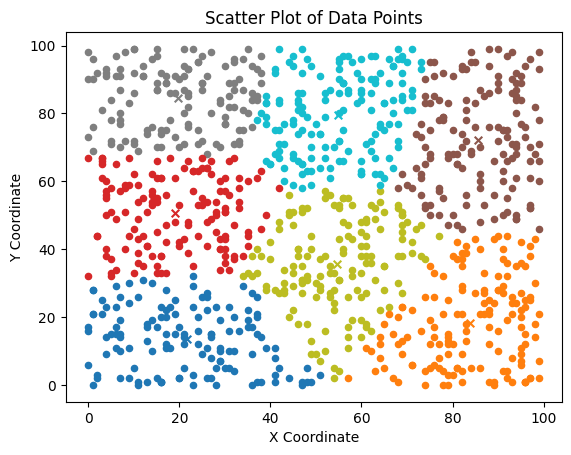

In [98]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Reshape the array to (100, 2) for plotting
colors = list(set(mcolors.TABLEAU_COLORS))
# print(colors)
reshaped_centers = centers.reshape(-1, 2)
cx_coords = reshaped_centers[:, 0]
cy_coords = reshaped_centers[:, 1]

for i,M in enumerate(reclus):

  reshaped_data = M.reshape(-1, 2)
  x_coords = reshaped_data[:, 0]
  y_coords = reshaped_data[:, 1]
  plt.scatter(x_coords, y_coords, marker="o", color=colors[i], s=20)
  plt.scatter(cx_coords[i], cy_coords[i], marker="x", color=colors[i], s=30)

# print(clusters.shape)
# Extract x and y coordinates




# Create a scatter plot



# Add labels and title
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Scatter Plot of Data Points")

# Display the plot
plt.show()

In [8]:
# a = [1,2,3]
a = np.array(a)

In [9]:
a

array([1, 2, 3])